In [ ]:
#붓꽃의 품종 판별 - 분류
#setosa versicolor virginica

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
iris= datasets.load_iris() #내장 데이터셋 읽어오기

print(iris['DESCR'])

In [6]:
iris.keys() #iris는 딕셔너리 형태 key값만 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris['target'].shape #150개의 목표 변수 -> 품종

(150,)

In [15]:
print(iris['data'].shape)

(150, 4)


In [13]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
#열이름 변경
df.columns =['sepal_length','sepal_width','petal_length','petal_width']

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df['target'] = iris['target']

df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
#데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [24]:
df.describe() #요약 통계 정보

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
#결측값 확인
df.isnull().sum()
# 데이터 프레임에 isnull() 적용하면 각 원소가 결측값인지 여부를 확인한다.
# 결측값이면 True 정상이면 False, 여기에 sum을 적용하면 각 열의 결측값을 
# 개수로 계산. 결측값이면 1로 인식되기 때문에 각열의 숫자를 모두 더해주는 sum함수의 출력 값이 각 열의 결측값의 개수가 된다.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [ ]:
# 결측값이 있으면 오류가 발생하므로 적절한 조치가 필요하다.

In [28]:
# 중복 데이터 확인

df.duplicated().sum()

1

In [29]:
df.loc[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


In [34]:
df.loc[(df.sepal_length ==5.8)&(df.petal_length==5.1)]

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2
114,5.8,2.8,5.1,2.4,2
142,5.8,2.7,5.1,1.9,2


In [37]:
#중복 데이터 삭제
df= df.drop_duplicates()

In [40]:
#상관 관계 분석
#corr 메소드는 변수 간의 상관 계수 행렬을 출력한다.
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


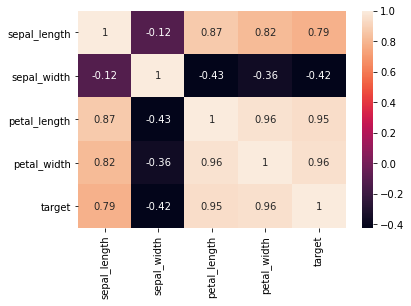

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [43]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 149, dtype: int32

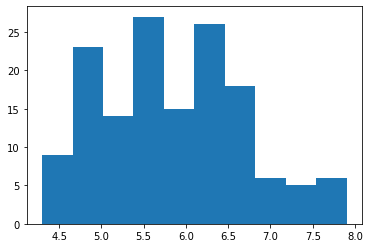

In [44]:
plt.hist(x='sepal_length', data=df)
plt.show()

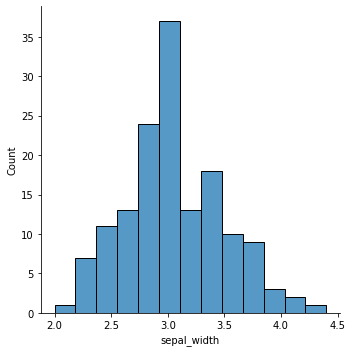

In [46]:
sns.displot(x='sepal_width',kind='hist',data=df)

plt.show()

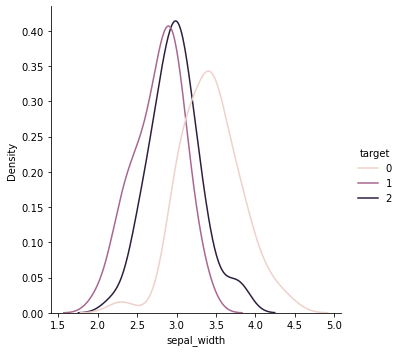

In [48]:
sns.displot(x='sepal_width',kind='kde',hue='target',data=df)
#hue = 는 그 값별로 나눠서 보여준다.
plt.show()

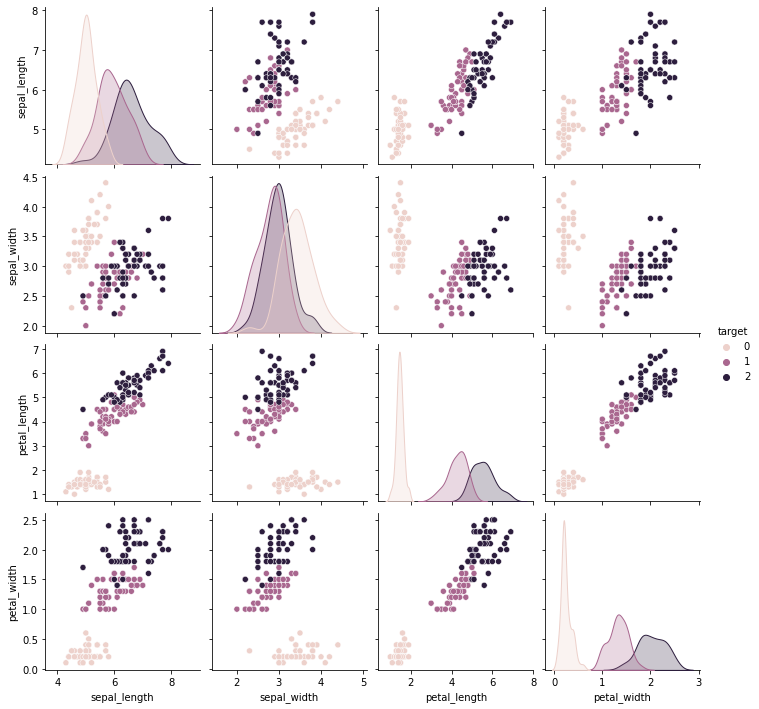

In [50]:
sns.pairplot(df, hue='target',diag_kind='kde')
plt.show()

# seaborn의 pairplot을 이용하면 서로 다른 치퍼간의 관계를 그림으로 한번에 그릴 수 있다. hue=옵션에 target열을 지정하여 목표 클래스별로 구분하여 표시.
# 대각선 방향, 즉 x축과 y축이 같으면 상관관계가 1이기 때문에 diag_kind에 적힌 그래프로 표시 x축은 열의이름, y축은 density로 한다.

In [56]:
# Train - Test 데이터 셋 분할
# 훈련데이터(모델 학습에 사용)와 테스트 데이터(모델 성능을 평가)로 분할한다.
# sklearn 의 train_test_split 함수를 사용하면 쉽게 나눌 수 있다.
from sklearn.model_selection import train_test_split
#loc[행:열] 
X_data=df.loc[:,'sepal_length':'petal_width']
y_data =df.loc[:,'target']

X_train, X_test,y_train,y_test= train_test_split(X_data,y_data,test_size=0.2,shuffle=True,random_state=20)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

#shuffle = 데이터 섞기, randon_state는 데이터를 일정량씩 뽑아낸다.

(119, 4) (119,)
(30, 4) (30,)


In [ ]:
# KNN (K - Nearest - Neighbors) : K 근접 이웃 알고리즘 k는 대상 주변 이웃 개수
# 예측(분류)하려는 데이터 x가 주어지면 기존 데이터 중 속성이 비슷한
# K개의 이웃을 먼저 찾는다. 데이터 X를 둘러싼 k개의 가장 가까운 이웃을 찾고 이웃 데이터가 가장 많이 속해 있는 목표 클래스를 예측 값으로
# 결정한다.

# 가까운 이웃을 어떻게 설정하느냐에 따라서 그 대상이 어떤 클래스에 속할지 결정된다.

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [74]:
y_knn_pred=knn.predict(X_test)
y_knn_pred
#모델에 검증용 데이터를 넣어 예측값 산출
#테스트 데이터 (X_test)

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [75]:
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(y_test,y_knn_pred)
knn_acc

#예측 값(y_knn_pred)과 정답(y_test)을 비교하여 모델 예측의 정확도를 산출한다.
# 즉, 붓꽃 품종을 정확히 분류한 비율

#k=5 -> 0.97
#k=3 -> 0.93
#k=9 -> 1.0

#하이퍼파라미터 튜닝 : 속성 값을 조정하여 성능을 개선할 수 있다.

1.0

In [97]:
# 의사결정나무 Decision Tree 의사결정나무

# 의사 결정 나무 모델은 트리 알고리즘을 사용한다. 트리의 각 분기점에는 데이터셋의 피처를 하나씩 위치시킨다.
# 임의의 조건으로 계속 2개 이상의 줄기로 가지를 나누면서 데이터를 구분한다.
# 이 때 각 분기점에서 분류가 가장 잘 되는 최적의 기준을 찾는 과정이 중요하다.

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [98]:
# 예측
y_dtc_pred = dtc.predict(X_test)
y_dtc_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [99]:
dtc_acc = accuracy_score(y_test, y_dtc_pred)
dtc_acc


#max_depth = 3 -> 0.93
#max_depth = 1 -> 0.67

0.9333333333333333